# Visualization of Spontaneous Activity in GBM Coculture
---------------------------------------------------

Explanation

## Import Libraries

In [1]:
import pickle
import os

import numpy as np
from PIL import Image
import re
import glob


from src.cmos_plotter.Plotter_Class import MetricsPlotter, SpontaneousActivityPlotter

## Define Parameters

In [2]:
DATA_PATH = "Z:/gbm_project/1_Subprojects/2D_GBM_Coculture/3_Processed_Data/Microstructure_Activity/MS_Activity_All/Spike_Data"
ELECTRODE_SELECTION_PATH = "Z:/gbm_project/1_Subprojects/2D_GBM_Coculture/3_Processed_Data/Microstructure_Activity/MS_Activity_All/Electrode_Selections"
VOLTAGE_MAPS_PATH = "Z:/gbm_project/1_Subprojects/2D_GBM_Coculture/2_Raw_Data/Microstructure_Activity/MS_Activity_All/Voltage_Maps"
OUTPUT_PATH = "Z:/gbm_project/1_Subprojects/2D_GBM_Coculture/3_Processed_Data/Microstructure_Activity/MS_Activity_All/Plots"

## Get cancer electrodes

In [3]:
# Initialize an empty list to store electrodes
cancer_electrodes = []

# Iterate through each file in the folder
for file_path in glob.glob(os.path.join(ELECTRODE_SELECTION_PATH, '*.pkl')):
    # Load the dictionary from the pickle file
    with open(file_path, 'rb') as file:
        dict_content = pickle.load(file)
    
    # Check if the loaded dictionary contains the key "Subselection_Cancer"
    if f"Subselection_Cancer" in dict_content:
        # Extract the electrodes from the dictionary and add them to the list
        cancer_electrodes.extend(dict_content[f"Subselection_Cancer"]["Electrodes"])


print(f"The cancer electrodes are: {cancer_electrodes}")

The cancer electrodes are: [12781, 12782, 12783, 12785, 12786, 12787, 12788, 12789, 12792, 13001, 13002, 13006, 13007, 13008, 13012, 13221, 13222, 13227, 13228, 13232, 13441, 13442, 13446, 13447, 13448, 13451, 13452, 13661, 13662, 13665, 13666, 13667, 13668, 13671, 13672, 13881, 13882, 13886, 13888, 13892, 14101, 14105, 14106, 14107, 14108, 14111, 14112, 14321, 14322, 14325, 14326, 14327, 14330, 14331, 14332, 14541, 14544, 14545, 14546, 14547, 14550, 14551, 14552, 14761, 14764, 14765, 14766, 14767, 14770, 14771, 14772, 14985, 14986, 14987, 14990, 14991, 14992, 15201, 15204, 15205, 15206, 15207, 15210, 15211, 15212, 15421, 15424, 15425, 15426, 15429, 15430, 15431, 15432, 15641, 15644, 15645, 15646, 15649, 15650, 15651, 15652, 15864, 15865, 15866, 15869, 15870, 15871, 15872, 16083, 16084, 16085, 16086, 16089, 16090, 16091, 16303, 16304, 16305, 16306, 16309, 16310, 16311, 16312, 16523, 16524, 16525, 16526, 16528, 16529, 16530, 16531, 16743, 16744, 16745, 16746, 16748, 16749, 16750, 16751,

# Plot Metrics Over Time

In [3]:
plotter = MetricsPlotter(input_path=DATA_PATH, df_name="processed_and_included_data.pkl", output_path=OUTPUT_PATH, multiple_exp=False)

In [4]:
data = plotter.data_relative
data[data["DIV_NGN"]==28]

,DIV_NGN,DIV_GBM,CHIP_ID,NW_ID,GBM_Type,NBR,NBD,NIBIm,NIBIstd,NIBIcv,...,ISIm,ISIstd,ISIcv,BR,BD,IBIm,IBIstd,IBIcv,BSR,EXP_ID
9,28,0,1689,3,BG5,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
27,28,0,1689,8,BG5,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.0
28,28,0,1654,4,control,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
31,28,0,1688,4,BG5,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
48,28,0,1654,1,control,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
59,28,0,1688,1,BG5,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
65,28,0,1689,5,BG5,0.0,0.0,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
106,28,0,1688,0,BG5,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
159,28,0,1689,0,BG5,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
166,28,0,1654,3,control,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [13]:

# Concatenate CHIP_ID and NW_ID columns to create a new combined column
data['Combined'] =data['CHIP_ID'].astype(str) + '_' + data['NW_ID'].astype(str)

# Count the number of unique combinations
unique_combinations_count = data[data["GBM_Type"]=="BG5"]['Combined'].nunique()
unique_combinations_count

25

In [6]:
# Remove wrong data
#filtered_df = data[~((data['CHIP_ID'].isin([1103, 1158, 1782, 1856])) & ((data['DIV_GBM']==2) | (data['DIV_GBM']==1)))]

#plotter.data_relative = filtered_df


2024-03-15 15:59:55,421 Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-15 15:59:55,423 Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-15 15:59:58,259 Plots saved under Z:/gbm_project/1_Subprojects/2D_GBM_Coculture/3_Processed_Data/Microstructure_Activity/MS_Activity_All/Plots
2024-03-15 16:00:01,170 Plots saved under Z:/gbm_project/1_Subprojects/2D_GBM_Coculture/3_Processed_Data/Microstructure_Activity/MS_Activity_All/Plots


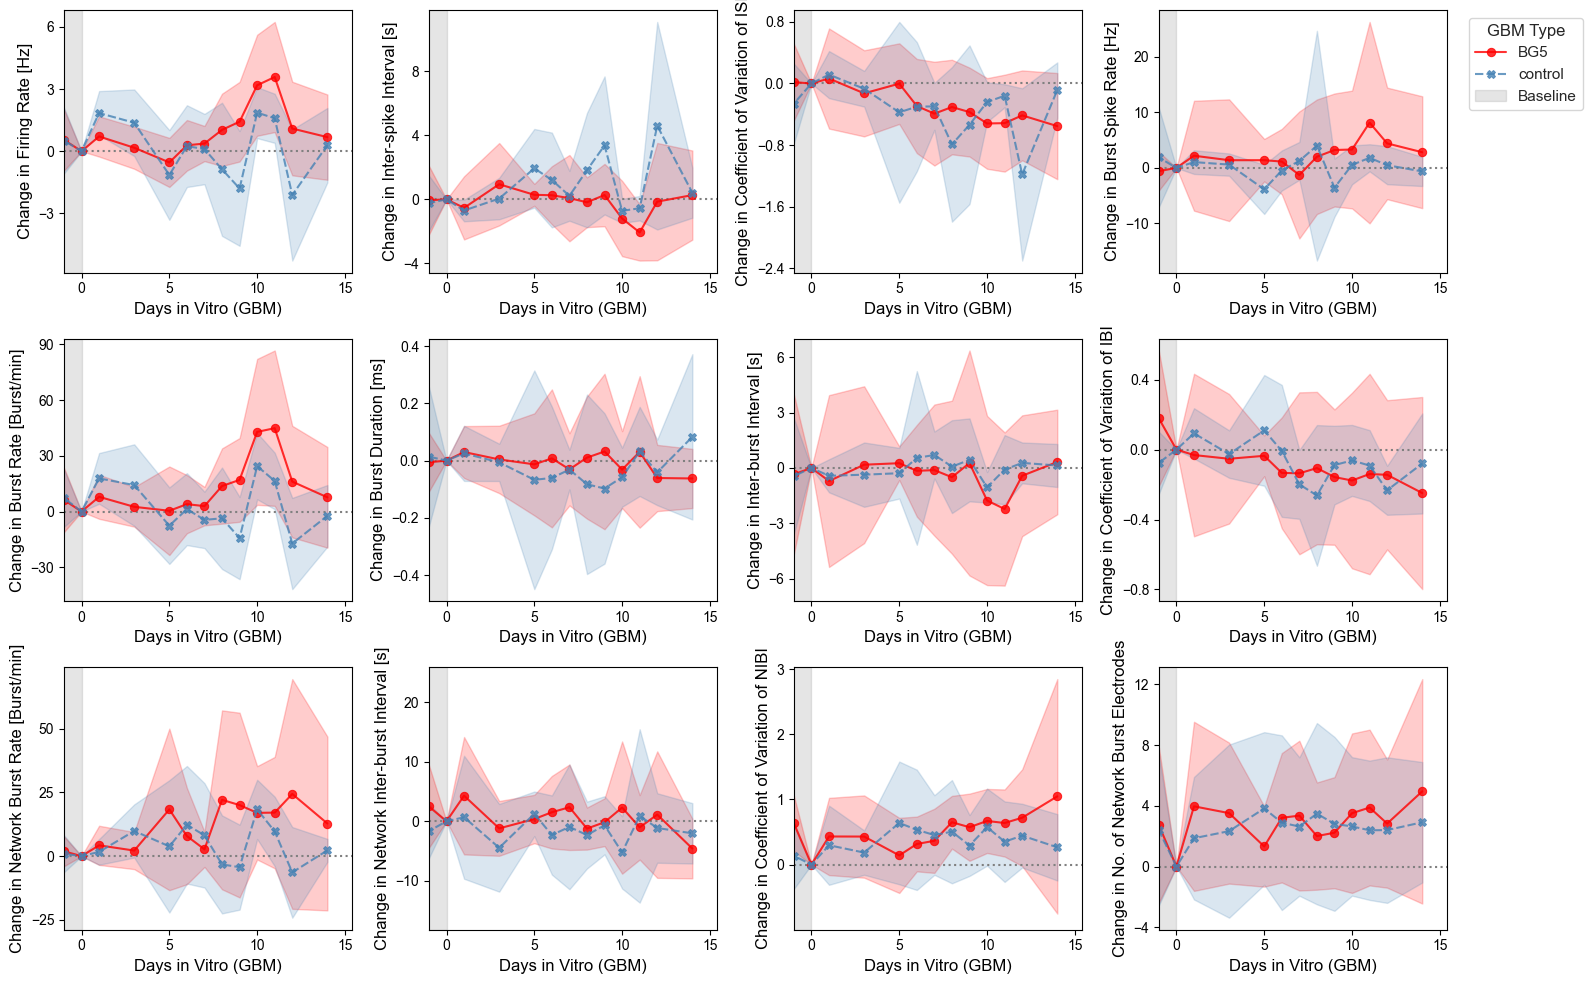

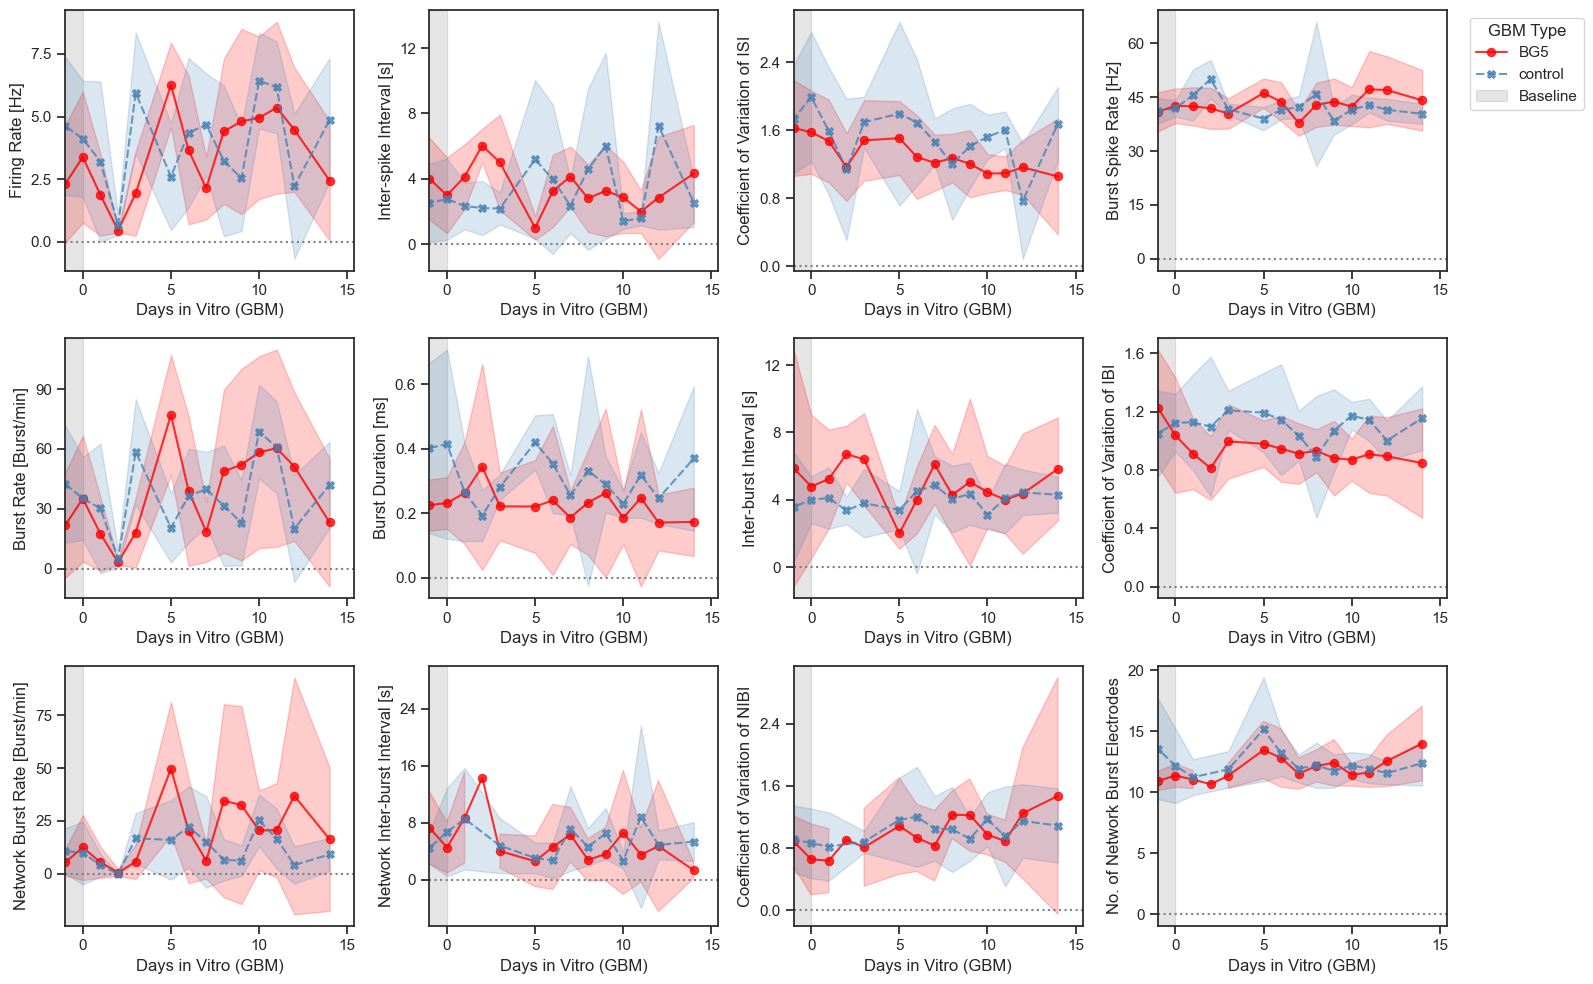

In [7]:
plotter.plot_metrics_over_time(use_relatives=True)
plotter.plot_metrics_over_time(use_relatives=False)


2024-03-05 10:10:55,958 Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-05 10:10:55,960 Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-05 10:10:58,905 Plots saved under Z:/gbm_project/1_Subprojects/2D_GBM_Coculture/3_Processed_Data/Microstructure_Activity/MS_Activity_7/Plots


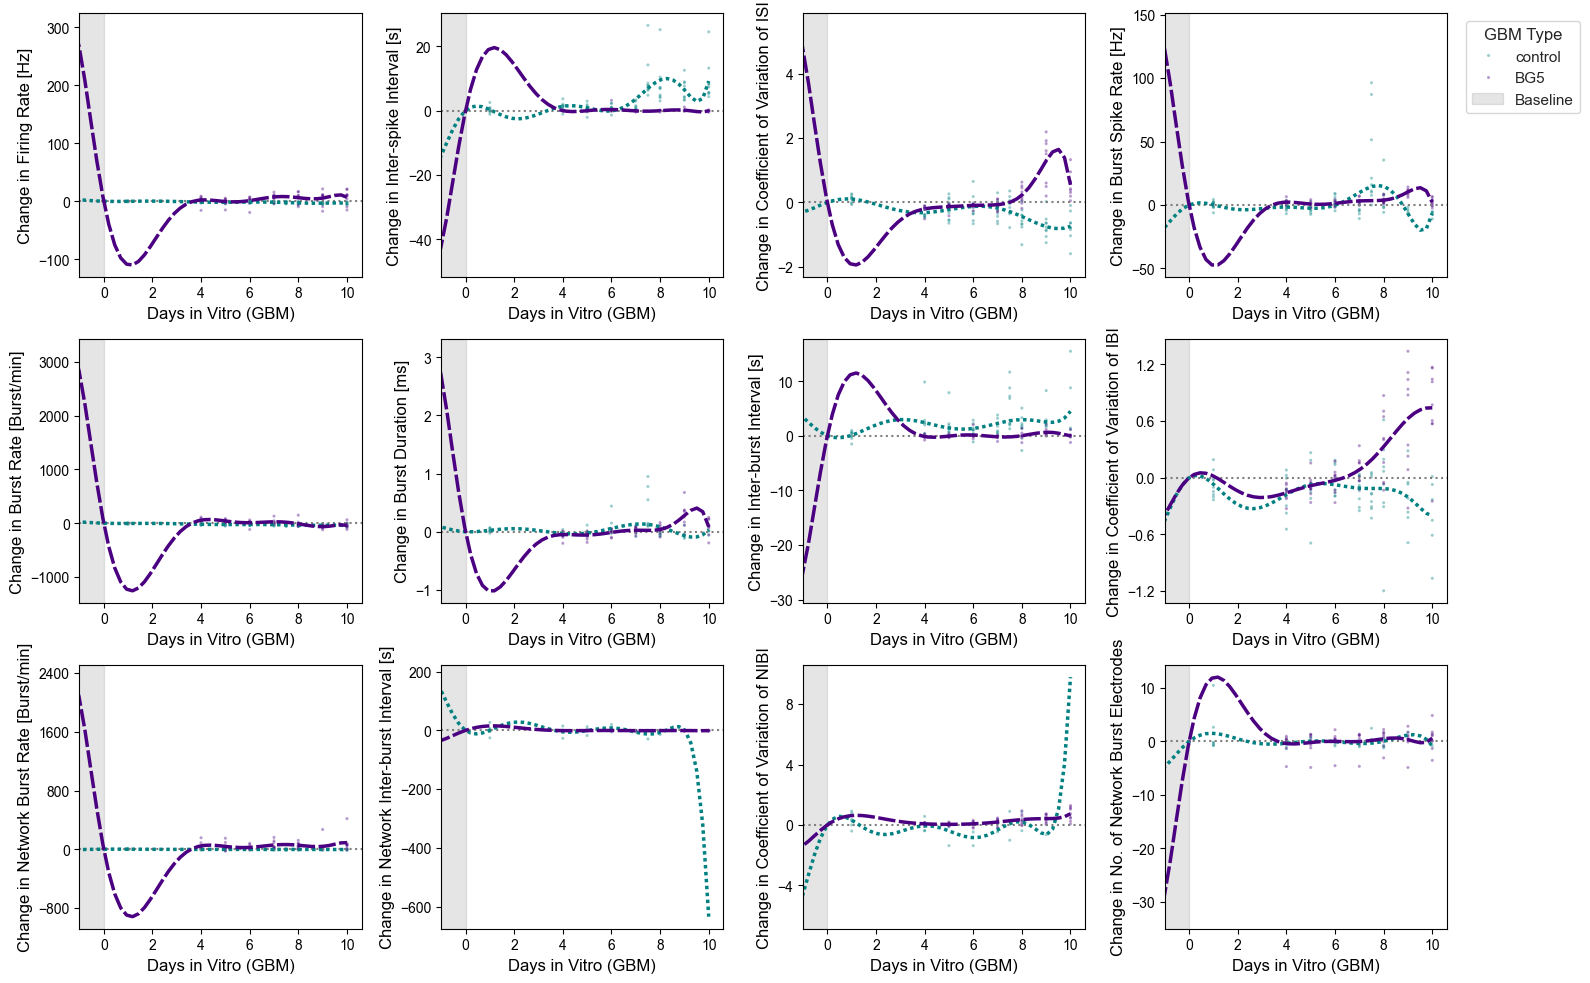

In [5]:
 plotter.plot_metrics_over_time(use_relatives=True, polynomial=True)

2024-02-07 15:10:36,638 Plots saved under Z:/gbm_project/1_Subprojects/2D_GBM_Coculture/3_Processed_Data/Microstructure_Activity/MS_Activity_All/Plots


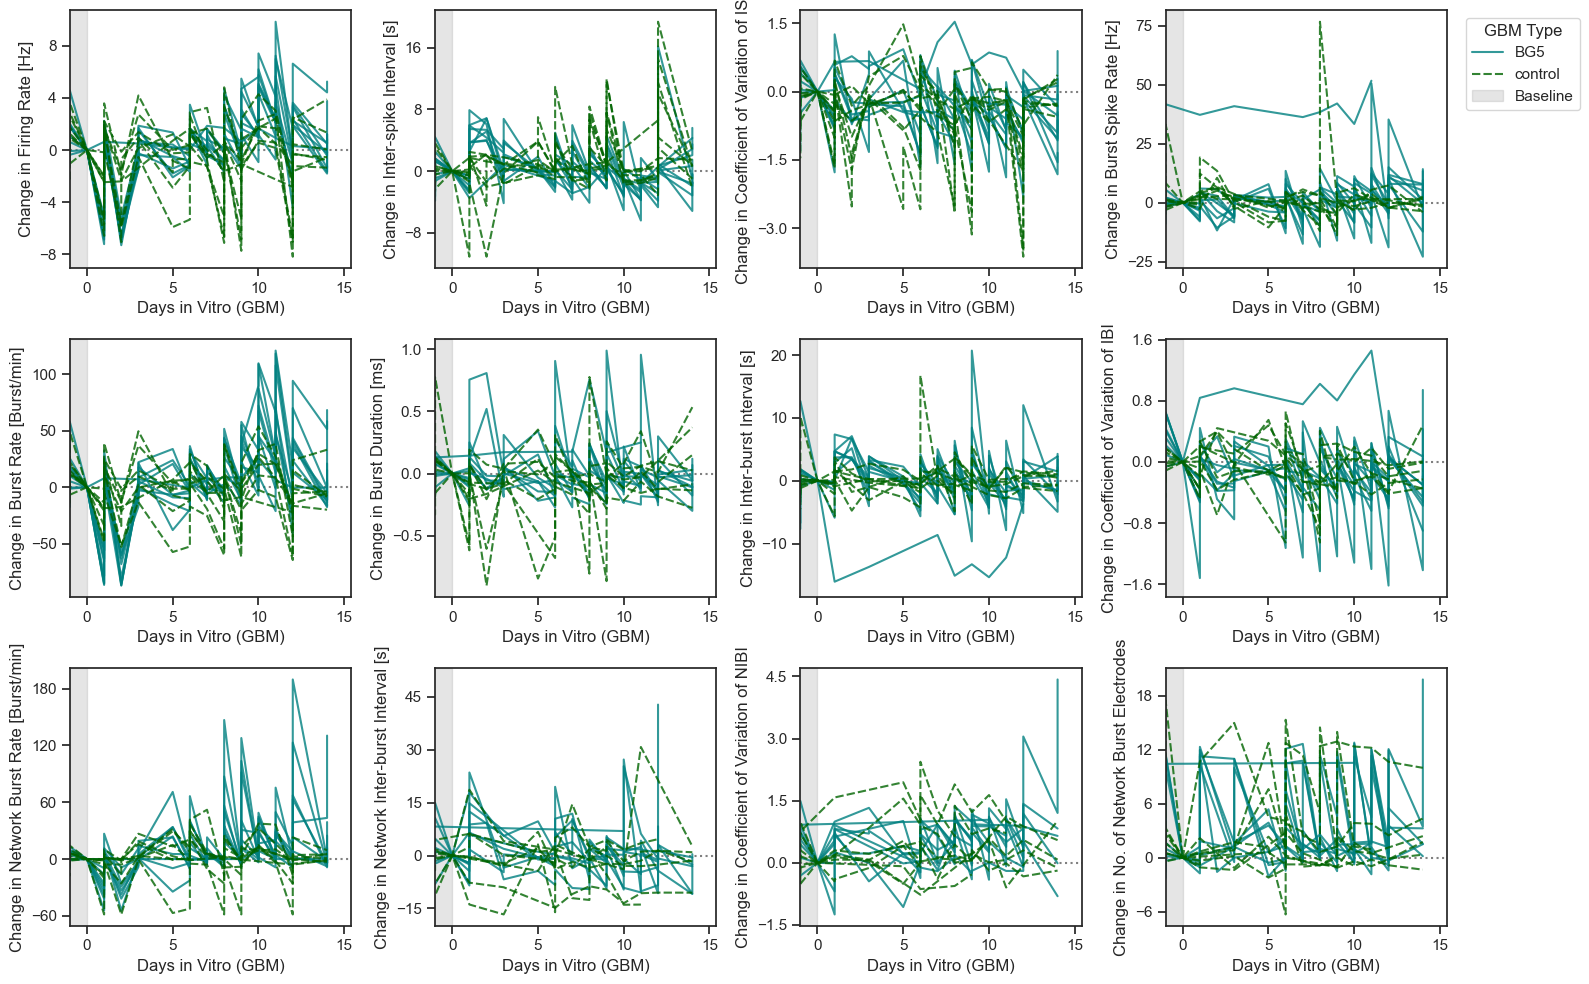

In [6]:
plotter.plot_metrics_over_time(use_relatives=True, plot_mean=False)

In [5]:
# Plot metrics over time for cancer vs. non-cancer channels
data = plotter.data_all

# Function to update GBM_Type based on conditions
def update_gbm_type(row):
    if row['GBM_Type'] == 'BG5':
        if int(row['EL']) in cancer_electrodes:
            return 'BG5_Cancer_Channel'
        else:
            return 'BG5_Control_Channel'
    else:
        return row['GBM_Type']

# Apply the function to the dataframe
data['GBM_Type'] = data.apply(update_gbm_type, axis=1)

In [6]:
plotter.data_all = data
plotter.data_relative = plotter.get_relative_values()

2024-03-15 15:32:57,704 Plots saved under Z:/gbm_project/1_Subprojects/2D_GBM_Coculture/3_Processed_Data/Microstructure_Activity/MS_Activity_7/Plots


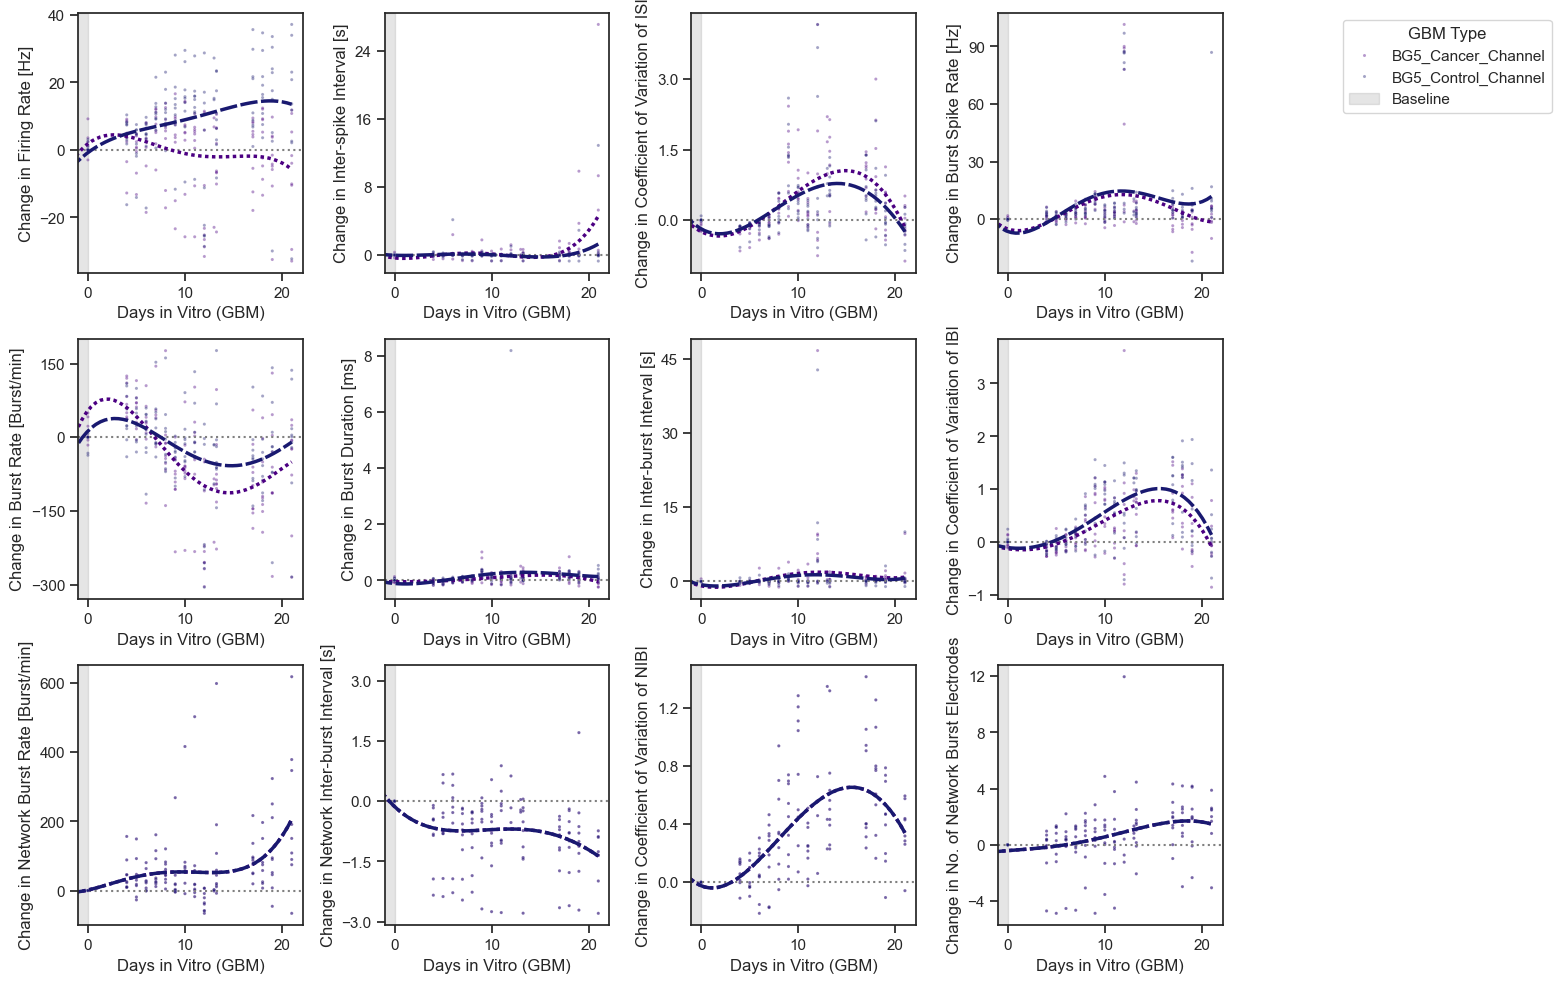

In [8]:
plotter.data_relative = plotter.data_relative[plotter.data_relative["GBM_Type"]!= "control"]

plotter.plot_metrics_over_time(use_relatives=True, use_channels=True, polynomial=True)

## Plot Spontaneous Activity Patters

In [3]:
# Get all network activity files
activity_files = os.listdir(DATA_PATH)
activity_files = [file for file in activity_files if file.startswith("ID")]

print(f"There are {len(activity_files)} files to process.")

There are 427 files to process.


In [4]:
%%capture

for file in activity_files:
    print(f"Processing file {file}.")

    # Plot spike rasterplot
    plotter = SpontaneousActivityPlotter(filename=file, input_path=DATA_PATH, output_path=OUTPUT_PATH)
    plotter.plot_spike_raster_plot(electrode_subselection=None)

print(f"Plotted all the plots to plot. :)")


2024-03-12 18:13:54,471 Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-12 18:13:54,474 Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-12 18:13:55,505 Spike rasterplot for ID1688_N4_DIV39_DATE20231223_spontaneous_BG5.raw_processed.pkl was created and saved successfully.
2024-03-12 18:13:56,260 Spike rasterplot for ID1689_N3_DIV40_DATE20231224_spontaneous_BG5.raw_processed.pkl was created and saved successfully.
2024-03-12 18:13:57,170 Spike rasterplot for ID1654_N3_DIV16_DATE20231130_spontaneous_baseline.raw_processed.pkl was created and saved successfully.
2024-03-12 18:13:58,066 Spike rasterplot for ID1654_N4_DIV39_DATE20231223_spontaneous_control.raw_processed.pkl was created and saved successfully.
2024-03-12 18:13:59,116 Spike rasterplot for ID1688_N6_DIV20_DATE20231204_spontaneous_baseline.raw_processed.pkl was created and saved successfully.
2024-03-12 18:13:59,986 Spike rasterplot for ID1688_N0_DIV24_DATE20231

KeyboardInterrupt: 


# Analysis of Channels

In [3]:
# Get all network activity files
activity_files = os.listdir(DATA_PATH)
activity_files = [file for file in activity_files if file.startswith("ID")]
activity_files = [file for file in activity_files if "with_corr" not in file]

print(f"There are {len(activity_files)} files to process.")


There are 425 files to process.


In [4]:
correlation_matrices = {}

for file in activity_files:
    print(f"Processing file {file}.")
    
    # Check if file was already processed
    filepath = os.path.join(DATA_PATH, file)
    filepath = os.path.splitext(filepath)[0] + "_with_corr.pkl"

    if os.path.isfile(filepath):
        print("File was already processed.")
    
    else: 

        # Get corresponding channel electrode selection
        c_id = file.split("_")[0][2:]
        n_id = file.split("_")[1][1:]
        channel_selection_prefix = f"Channel_Subselections_ID{c_id}_N{n_id}"
        filtered_file = [f for f in os.listdir(ELECTRODE_SELECTION_PATH) if f.startswith(channel_selection_prefix)][0]
        
        with open(os.path.join(ELECTRODE_SELECTION_PATH, filtered_file), 'rb') as s:
            channel_info = pickle.load(s)
        
        # Get corresponding voltage map
        all_maps = os.listdir(VOLTAGE_MAPS_PATH)
        map_to_process = [file_name for file_name in all_maps if str(c_id) in file_name][0]
        voltage_map = np.load(os.path.join(VOLTAGE_MAPS_PATH, map_to_process))
            
        # Get correlation matrix
        plotter = SpontaneousActivityPlotter(filename=file, input_path=DATA_PATH, output_path=OUTPUT_PATH)
        plotter.get_cross_correlation(channel_info=channel_info, save_max_corr=True)
        
        # Save cross correlation matrices
        correlation_matrices[file] = {
                                        "Correlations": plotter.cross_correlation_matrix,
                                        "Lags": plotter.cross_correlation_delays
        }
        
        # Plot Correlation matrices
        plotter.plot_correlation_matrix()
        
        # Plot STTRPs
        #plotter.find_most_act_el_per_channel(channel_info=channel_info)
        #channel_electrodes = [channel_data['Electrode'] for channel_data in plotter.most_act_el_per_channel.values()]
        #sorted_channels = sorted(plotter.most_act_el_per_channel.items(), key=lambda x: x[1]['Firing Rate'], reverse=True)
        
        # Extract the top three electrodes with the highest firing rate
        #most_act_electrodes = [channel_data['Electrode'] for _, channel_data in sorted_channels[:3]]
        #color_map = plotter.plot_STTRP(triggering_electrodes=most_act_electrodes, electrode_subselection=channel_electrodes, voltage_map=voltage_map)
        

# Save correlation matrices
pickle_file_path = os.path.join(OUTPUT_PATH, 'correlation_matrices.pkl')

with open(pickle_file_path, 'wb') as f:
    pickle.dump(correlation_matrices, f)


Processing file ID1688_N4_DIV39_DATE20231223_spontaneous_BG5.raw_processed.pkl.
File was already processed.
Processing file ID1689_N3_DIV40_DATE20231224_spontaneous_BG5.raw_processed.pkl.
File was already processed.
Processing file ID1654_N3_DIV16_DATE20231130_spontaneous_baseline.raw_processed.pkl.
File was already processed.
Processing file ID1654_N4_DIV39_DATE20231223_spontaneous_control.raw_processed.pkl.
File was already processed.
Processing file ID1688_N6_DIV20_DATE20231204_spontaneous_baseline.raw_processed.pkl.
File was already processed.
Processing file ID1688_N0_DIV24_DATE20231208_spontaneous_baseline.raw_processed.pkl.
File was already processed.
Processing file ID1688_N1_DIV20_DATE20231204_spontaneous_baseline.raw_processed.pkl.
File was already processed.
Processing file ID1688_N2_DIV42_DATE20231226_spontaneous_BG5.raw_processed.pkl.
File was already processed.
Processing file ID1654_N3_DIV24_DATE20231208_spontaneous_baseline.raw_processed.pkl.
File was already processed.

# Convert to PDFs

In [10]:
# MAKE THIS AS UTILS FUNCTION!!!

FOLDER_PATH = "Y:/gbm_project/1_Subprojects/2D_GBM_Coculture/3_Processed_Data/Microstructure_Activity/MS_Activity_5/Plots/STTRPS"

def stack_images_vertically(folder_path, y_offset=30):
    png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

    # Filter files that contain the number "28"
    baseline_files = [f for f in png_files if "36" in f]

    for file in baseline_files:
        # Get corresponding files
        c_id = file.split("_")[1][2:]
        n_id = file.split("_")[2][1:]
        trigger = file.split("_")[-1][7:-4]
        corresponding_files = [f for f in png_files if f"ID{c_id}_N{n_id}" in f and f"Trigger{trigger}" in f]

        # Sort SVG files based on the date in the filename
        date_pattern = re.compile(r'DIV(\d{2})')
        sorted_files = sorted(corresponding_files, key=lambda x: re.search(date_pattern, x).group())

        # Load images
        images = [Image.open(os.path.join(folder_path, image_path)) for image_path in sorted_files]

        if len(images) == 0:
            print("No images could be found.")

        else:
            # Find the maximum width and height of the stacked images
            max_width = max(img.width for img in images)
            total_height = sum(img.height for img in images)+y_offset*len(images)

            # Create a new blank image with the maximum width and total height
            result_image = Image.new("RGB", (max_width, total_height), color="white")

            # Paste each image onto the result image, stacking them vertically
            y_pos = 0
            for img in images:
                result_image.paste(img, (0, y_pos))
                y_pos += img.height+y_offset

            # Save the resulting image
            result_image.save(os.path.join(FOLDER_PATH, f"STTRP_Chip{c_id}_Network{n_id}_Trigger{trigger}.png"))


stack_images_vertically(FOLDER_PATH)

2023-12-22 14:14:48,122 STREAM b'IHDR' 16 13
2023-12-22 14:14:48,122 STREAM b'tEXt' 41 57
2023-12-22 14:14:48,122 STREAM b'pHYs' 110 9
2023-12-22 14:14:48,122 STREAM b'IDAT' 131 65536
2023-12-22 14:14:48,162 STREAM b'IHDR' 16 13
2023-12-22 14:14:48,162 STREAM b'tEXt' 41 57
2023-12-22 14:14:48,162 STREAM b'pHYs' 110 9
2023-12-22 14:14:48,162 STREAM b'IDAT' 131 65536
2023-12-22 14:14:48,202 STREAM b'IHDR' 16 13
2023-12-22 14:14:48,202 STREAM b'tEXt' 41 57
2023-12-22 14:14:48,202 STREAM b'pHYs' 110 9
2023-12-22 14:14:48,202 STREAM b'IDAT' 131 65536
2023-12-22 14:14:48,241 STREAM b'IHDR' 16 13
2023-12-22 14:14:48,241 STREAM b'tEXt' 41 57
2023-12-22 14:14:48,255 STREAM b'pHYs' 110 9
2023-12-22 14:14:48,255 STREAM b'IDAT' 131 22323
2023-12-22 14:14:48,276 STREAM b'IHDR' 16 13
2023-12-22 14:14:48,276 STREAM b'tEXt' 41 57
2023-12-22 14:14:48,276 STREAM b'pHYs' 110 9
2023-12-22 14:14:48,276 STREAM b'IDAT' 131 65536
2023-12-22 14:14:48,310 STREAM b'IHDR' 16 13
2023-12-22 14:14:48,310 STREAM b'tE

No images could be found.


2023-12-22 14:15:13,758 STREAM b'IHDR' 16 13
2023-12-22 14:15:13,758 STREAM b'tEXt' 41 57
2023-12-22 14:15:13,758 STREAM b'pHYs' 110 9
2023-12-22 14:15:13,762 STREAM b'IDAT' 131 65536
2023-12-22 14:15:13,791 STREAM b'IHDR' 16 13
2023-12-22 14:15:13,791 STREAM b'tEXt' 41 57
2023-12-22 14:15:13,791 STREAM b'pHYs' 110 9
2023-12-22 14:15:13,791 STREAM b'IDAT' 131 65536
2023-12-22 14:15:13,832 STREAM b'IHDR' 16 13
2023-12-22 14:15:13,832 STREAM b'tEXt' 41 57
2023-12-22 14:15:13,832 STREAM b'pHYs' 110 9
2023-12-22 14:15:13,832 STREAM b'IDAT' 131 65536
2023-12-22 14:15:13,849 STREAM b'IHDR' 16 13
2023-12-22 14:15:13,849 STREAM b'tEXt' 41 57
2023-12-22 14:15:13,849 STREAM b'pHYs' 110 9
2023-12-22 14:15:13,849 STREAM b'IDAT' 131 65536
2023-12-22 14:15:13,878 STREAM b'IHDR' 16 13
2023-12-22 14:15:13,878 STREAM b'tEXt' 41 57
2023-12-22 14:15:13,878 STREAM b'pHYs' 110 9
2023-12-22 14:15:13,878 STREAM b'IDAT' 131 65536
2023-12-22 14:15:13,904 STREAM b'IHDR' 16 13
2023-12-22 14:15:13,904 STREAM b'tE

No images could be found.


2023-12-22 14:15:30,739 STREAM b'tEXt' 41 57
2023-12-22 14:15:30,740 STREAM b'pHYs' 110 9
2023-12-22 14:15:30,740 STREAM b'IDAT' 131 65536
2023-12-22 14:15:30,760 STREAM b'IHDR' 16 13
2023-12-22 14:15:30,761 STREAM b'tEXt' 41 57
2023-12-22 14:15:30,761 STREAM b'pHYs' 110 9
2023-12-22 14:15:30,762 STREAM b'IDAT' 131 65536
2023-12-22 14:15:30,787 STREAM b'IHDR' 16 13
2023-12-22 14:15:30,788 STREAM b'tEXt' 41 57
2023-12-22 14:15:30,788 STREAM b'pHYs' 110 9
2023-12-22 14:15:30,789 STREAM b'IDAT' 131 65536
2023-12-22 14:15:30,813 STREAM b'IHDR' 16 13
2023-12-22 14:15:30,814 STREAM b'tEXt' 41 57
2023-12-22 14:15:30,814 STREAM b'pHYs' 110 9
2023-12-22 14:15:30,815 STREAM b'IDAT' 131 65536
2023-12-22 14:15:30,835 STREAM b'IHDR' 16 13
2023-12-22 14:15:30,836 STREAM b'tEXt' 41 57
2023-12-22 14:15:30,837 STREAM b'pHYs' 110 9
2023-12-22 14:15:30,838 STREAM b'IDAT' 131 65536
2023-12-22 14:15:30,865 STREAM b'IHDR' 16 13
2023-12-22 14:15:30,866 STREAM b'tEXt' 41 57
2023-12-22 14:15:30,866 STREAM b'pH

In [61]:
FOLDER_PATH = "Z:/gbm_project/1_Subprojects/2D_GBM_Coculture/3_Processed_Data/Microstructure_Activity/MS_Activity_7/Plots/Rasterplots"

def stack_images_vertically(folder_path, y_offset=30):
    png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

    # Filter files that contain the number "28"
    baseline_files = [f for f in png_files if "23" in f]

    for file in baseline_files:
        # Get corresponding files
        c_id = file.split("_")[2][2:]
        n_id = file.split("_")[3][1:]
        corresponding_files = [f for f in png_files if f"ID{c_id}_N{n_id}" in f]

        # Sort SVG files based on the date in the filename
        date_pattern = re.compile(r'DIV(\d{2})')
        sorted_files = sorted(corresponding_files, key=lambda x: re.search(date_pattern, x).group())

        # Load images
        images = [Image.open(os.path.join(folder_path, image_path)) for image_path in sorted_files]

        # Find the maximum width and height of the stacked images
        max_width = max(img.width for img in images)
        total_height = sum(img.height for img in images)+y_offset*len(images)

        # Create a new blank image with the maximum width and total height
        result_image = Image.new("RGB", (max_width, total_height), color="white")

        # Paste each image onto the result image, stacking them vertically
        y_pos = 0
        for img in images:
            result_image.paste(img, (0, y_pos))
            y_pos += img.height+y_offset

        # Save the resulting image
        result_image.save(os.path.join(FOLDER_PATH, f"Rasterplots_Chip{c_id}_Network{n_id}_all.png"))

stack_images_vertically(FOLDER_PATH)

2024-03-12 17:52:37,122 STREAM b'IHDR' 16 13
2024-03-12 17:52:37,123 STREAM b'tEXt' 41 57
2024-03-12 17:52:37,123 STREAM b'pHYs' 110 9
2024-03-12 17:52:37,124 STREAM b'IDAT' 131 65536
2024-03-12 17:52:37,132 STREAM b'IHDR' 16 13
2024-03-12 17:52:37,133 STREAM b'tEXt' 41 57
2024-03-12 17:52:37,133 STREAM b'pHYs' 110 9
2024-03-12 17:52:37,134 STREAM b'IDAT' 131 65536
2024-03-12 17:52:37,142 STREAM b'IHDR' 16 13
2024-03-12 17:52:37,142 STREAM b'tEXt' 41 57
2024-03-12 17:52:37,144 STREAM b'pHYs' 110 9
2024-03-12 17:52:37,144 STREAM b'IDAT' 131 65536
2024-03-12 17:52:37,153 STREAM b'IHDR' 16 13
2024-03-12 17:52:37,154 STREAM b'tEXt' 41 57
2024-03-12 17:52:37,154 STREAM b'pHYs' 110 9
2024-03-12 17:52:37,154 STREAM b'IDAT' 131 65536
2024-03-12 17:52:37,163 STREAM b'IHDR' 16 13
2024-03-12 17:52:37,164 STREAM b'tEXt' 41 57
2024-03-12 17:52:37,164 STREAM b'pHYs' 110 9
2024-03-12 17:52:37,165 STREAM b'IDAT' 131 65536
2024-03-12 17:52:37,173 STREAM b'IHDR' 16 13
2024-03-12 17:52:37,174 STREAM b'tE